## Importing Modules

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Creating the dataset

In [2]:
dataSet = pd.read_csv('./dataSet/Dataset_spine.csv')

In [3]:
dataSet.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'class', 'Unnamed: 13'],
      dtype='object')

Removing not important columns.
The 'target' column will be binary, 1 representing the patient has the positive diagnose, 0 representing the negative diagnose.

In [4]:
dataSet.drop([dataSet.keys()[-1]], axis=1, inplace=True)
dataSet['target'] = dataSet['class'].apply(lambda x: 0 if x == 'Abnormal' else 1)
dataSet

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class,target
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal,1


In [5]:
dataSet.drop('class', axis=1, inplace= True)

## Normalization

The data in the normalized form prevents from the model to consider criteria with bigger magnitude in virtue to other criteria

In [6]:
scale = StandardScaler()

dataSet = scale.fit_transform(dataSet)
dataSet

array([[ 0.14708636,  0.50136873, -0.6651769 , ..., -1.19658726,
         1.71236843, -0.69006556],
       [-1.24586434, -0.74876898, -1.45300075, ..., -0.94032533,
        -0.91394145, -0.69006556],
       [ 0.4843695 ,  0.46793218, -0.09926175, ..., -1.22717809,
        -0.61568643, -0.69006556],
       ...,
       [ 0.05520137,  0.51561812, -0.31097748, ...,  1.44337397,
        -0.69303204,  1.44913767],
       [-0.88582307, -0.88565951, -0.55861259, ...,  1.62384854,
         0.77376463,  1.44913767],
       [-1.54892681, -1.24785954, -0.82539423, ...,  1.29742294,
         1.43371339,  1.44913767]])

In [7]:
df = pd.DataFrame(dataSet)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0.951630,-1.015066,0.434293,1.167129,-1.196587,1.712368,-0.690066
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,-0.202553,-0.977816,1.316291,1.679551,-0.940325,-0.913941,-0.690066
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0.006694,0.639127,1.302680,1.635969,-1.227178,-0.615686,-0.690066
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,-0.363213,0.259554,-0.105211,-0.176157,-1.345020,-0.652989,-0.690066
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,0.246670,1.643094,0.851472,-1.059666,-0.190502,-0.069858,-0.690066
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,-0.731786,-0.392921,-0.860010,-0.646718,-0.035469,-0.814491,-1.202961,-1.562606,0.496104,-1.182667,-0.137294,-1.351275,1.449138
306,-0.381197,0.318116,-1.225991,-0.726682,-0.267362,-0.712503,-1.489758,-0.246123,1.512183,-1.677586,1.644047,1.746585,1.449138
307,0.055201,0.515618,-0.310977,-0.313564,0.582893,-0.773488,-1.373550,-0.593083,0.144949,-1.051583,1.443374,-0.693032,1.449138
308,-0.885823,-0.885660,-0.558613,-0.477128,0.047021,-0.695548,-1.099547,-0.763798,0.892189,-0.752649,1.623849,0.773765,1.449138


## Creating the train and test arrays

In [8]:
X = dataSet[:,0:12]
y = dataSet[:,-1]
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)

## Creating the MLP classifier #1

For the first MLP model, we chose the standard SciKit model, with one hidden layer containing 100 neurons.<br />
The max_iter is set as the default value: 200 iterations.<br />
The learning rate is set as the default value: 0.001<br />
The learning rate is set to be constant during all the training<br />
The solver is set as the default: 'adam'<br />
The activation function is set as the default: 'relu'<br />

In [9]:
mlpClassifier = MLPClassifier(max_iter=200,activation='relu', verbose=False, random_state=1,hidden_layer_sizes=(100,))
mlpClassifier.fit(X_train, y_train)
y_pred = mlpClassifier.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Analyzing the Classifier #1

Defining the function to obtain the percentage of correct answers

In [10]:
def analyze(targets,preds):
    hit = [True if preds[i] == targets[i] else False for i in range(len(targets))]
    hitRate = (hit.count(True)/len(hit))*100
    return hitRate

analyze(y_test, y_pred)

83.87096774193549

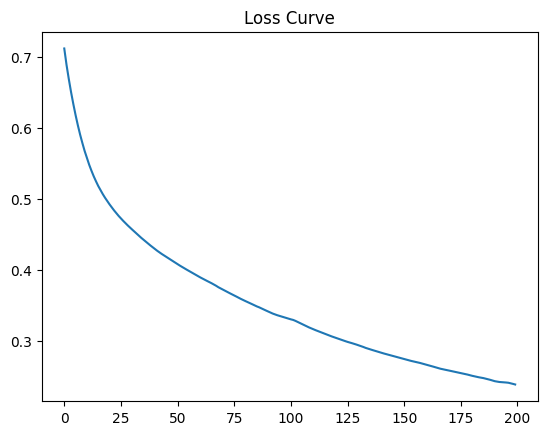

In [11]:
plt.title('Loss Curve')
plt.plot(range(len(mlpClassifier.loss_curve_)),mlpClassifier.loss_curve_)

<AxesSubplot:>

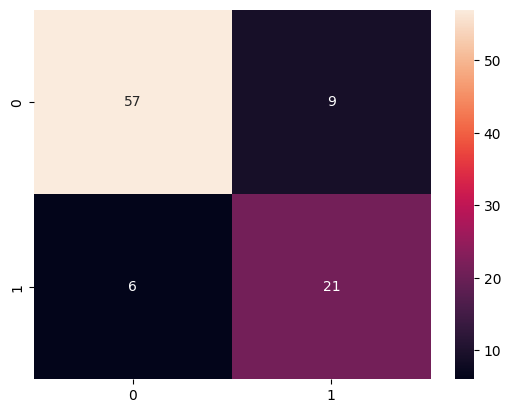

In [12]:
confMatrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(confMatrix),annot=True)

## Creating the MLP Classifire #2

For the second MLP model, we chose the standard SciKit model, but this time we are using only 50 neurons on our single hidden layer.<br />
The max_iter is set as the default value: 200 iterations.<br />
The learning rate is set as the default value: 0.001<br />
The learning rate is set to be constant during all the training<br />
The solver is set as the default: 'adam'<br />
The activation function is set as the default: 'relu'<br />

In [13]:
mlpClassifier2 = MLPClassifier(max_iter=200,activation='relu', verbose=False, hidden_layer_sizes=(50,),random_state=1)
mlpClassifier2.fit(X_train, y_train)
y_pred2 = mlpClassifier2.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Analyzing the Classifier #2

In [14]:
analyze(y_test, y_pred2)

81.72043010752688

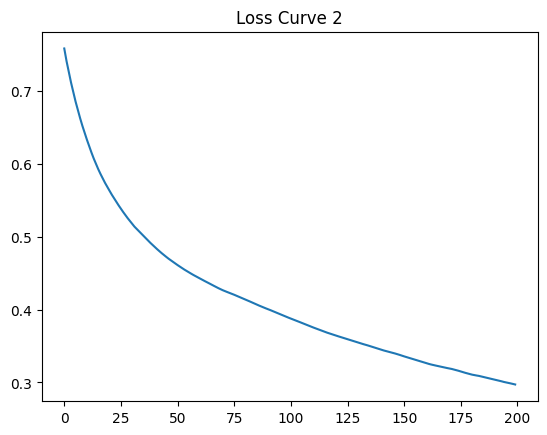

In [15]:
plt.title('Loss Curve 2')
plt.plot(range(len(mlpClassifier2.loss_curve_)),mlpClassifier2.loss_curve_)

<AxesSubplot:>

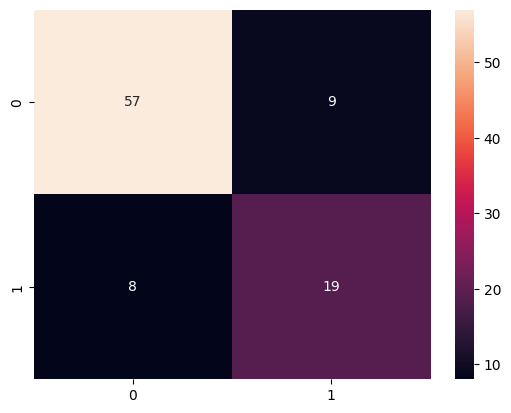

In [16]:
confMatrix2 = metrics.confusion_matrix(y_test,y_pred2)
sns.heatmap(pd.DataFrame(confMatrix2),annot=True)

## Creating the MLP Classifire #3

For the third MLP model, we chose the standard SciKit model, but this time we are using 150 neurons on our single hidden layer.<br />
The max_iter is set as the default value: 200 iterations.<br />
The learning rate is set as the default value: 0.001<br />
The learning rate is set to be constant during all the training<br />
The solver is set as the default: 'adam'<br />
The activation function is set as the default: 'relu'<br />

In [17]:
mlpClassifier3 = MLPClassifier(max_iter=200,activation='relu', verbose=False, hidden_layer_sizes=(150,),random_state=1)
mlpClassifier3.fit(X_train, y_train)
y_pred3 = mlpClassifier3.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Analyzing the Classifier #3

In [18]:
analyze(y_test, y_pred3)

82.79569892473118

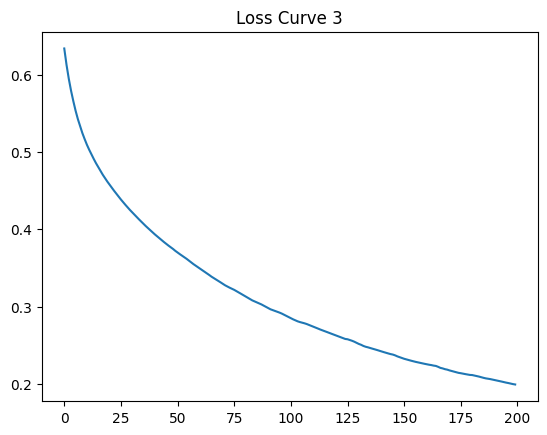

In [19]:
plt.title('Loss Curve 3')
plt.plot(range(len(mlpClassifier3.loss_curve_)),mlpClassifier3.loss_curve_)

<AxesSubplot:>

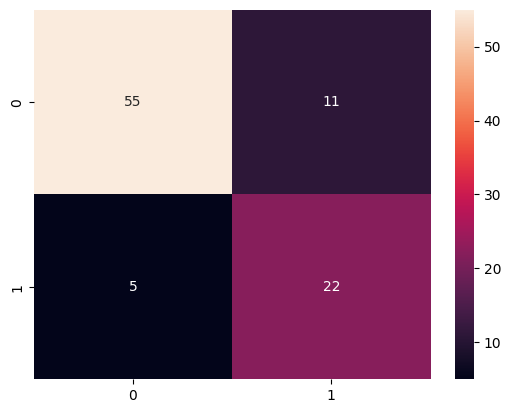

In [20]:
confMatrix3 = metrics.confusion_matrix(y_test,y_pred3)
sns.heatmap(pd.DataFrame(confMatrix3),annot=True)

## Creating the MLP Classifire #4

For the fourth MLP model, we chose the standard SciKit model, again with the same 150 neurons on the single hiden layer.<br />
The max_iter is set as the default value: 200 iterations.<br />
The learning rate is now setto a bigger value value: 0.005<br />
The learning rate is set to be constant during all the training<br />
The solver is set as the default: 'adam'<br />
The activation function is set as the default: 'relu'<br />

In [21]:
mlpClassifier4 = MLPClassifier(max_iter=200,activation='relu', verbose=False, hidden_layer_sizes=(150,),random_state=1,learning_rate_init=0.005)
mlpClassifier4.fit(X_train, y_train)
y_pred4 = mlpClassifier4.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Analyzing the Classifier #4

In [22]:
analyze(y_test, y_pred4)

77.41935483870968

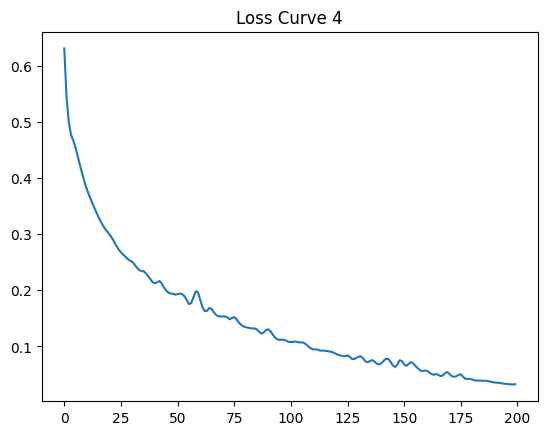

In [23]:
plt.title('Loss Curve 4')
plt.plot(range(len(mlpClassifier4.loss_curve_)),mlpClassifier4.loss_curve_)

<AxesSubplot:>

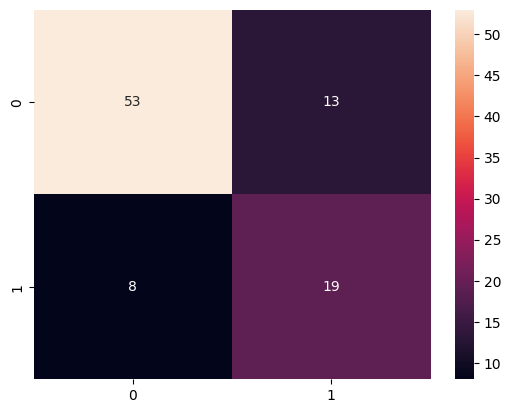

In [24]:
confMatrix4 = metrics.confusion_matrix(y_test,y_pred4)
sns.heatmap(pd.DataFrame(confMatrix4),annot=True)

## Creating the MLP Classifire #5

For the fith MLP model, we chose the standard SciKit model, but this time we are using three hidden layesr, each one containing 50 neurons.<br />
The max_iter is set as the default value: 200 iterations.<br />
The learning rate is set as the default value: 0.001<br />
The learning rate is set to be constant during all the training<br />
The solver is set as the default: 'adam'<br />
The activation function is set as the default: 'relu'<br />

In [25]:
mlpClassifier5 = MLPClassifier(max_iter=200,activation='relu', verbose=False, hidden_layer_sizes=(50,3),random_state=1,learning_rate_init=0.001)
mlpClassifier5.fit(X_train, y_train)
y_pred5 = mlpClassifier5.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Analyzing the Classifier #5

In [26]:
analyze(y_test, y_pred5)

82.79569892473118

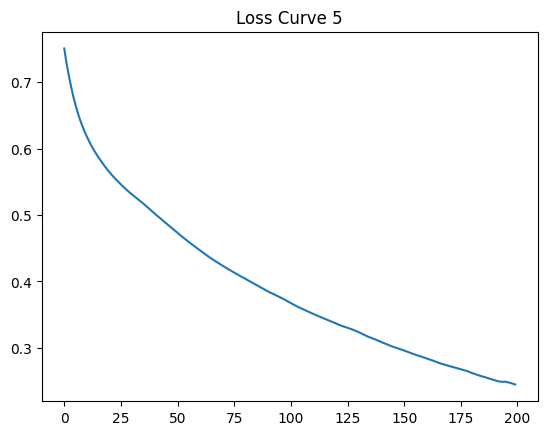

In [27]:
plt.title('Loss Curve 5')
plt.plot(range(len(mlpClassifier5.loss_curve_)),mlpClassifier5.loss_curve_)

<AxesSubplot:>

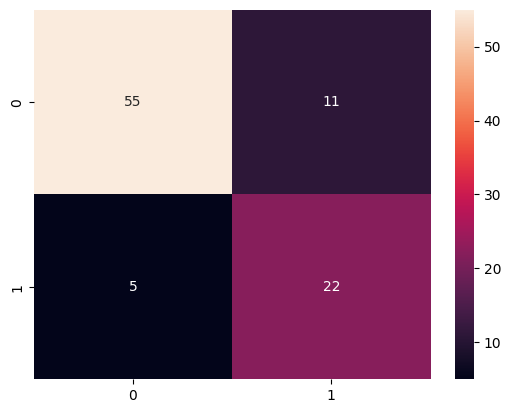

In [28]:
confMatrix5 = metrics.confusion_matrix(y_test,y_pred5)
sns.heatmap(pd.DataFrame(confMatrix5),annot=True)

## Creating the MLP Classifire #6

For the sixth MLP model, we chose the standard SciKit model, utilizing six hidden layers, each one with 25 neurons.<br />
The max_iter is set as the default value: 200 iterations.<br />
The learning rate is set as the default value: 0.001<br />
The learning rate is set to be constant during all the training<br />
The solver is set as the default: 'adam'<br />
The activation function is set as the default: 'relu'<br />

In [29]:
mlpClassifier6 = MLPClassifier(max_iter=200,activation='relu', verbose=False, hidden_layer_sizes=(25,10),random_state=1,learning_rate_init=0.001)
mlpClassifier6.fit(X_train, y_train)
y_pred6 = mlpClassifier6.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Analyzing the Classifier #6

In [30]:
analyze(y_test, y_pred6)

82.79569892473118

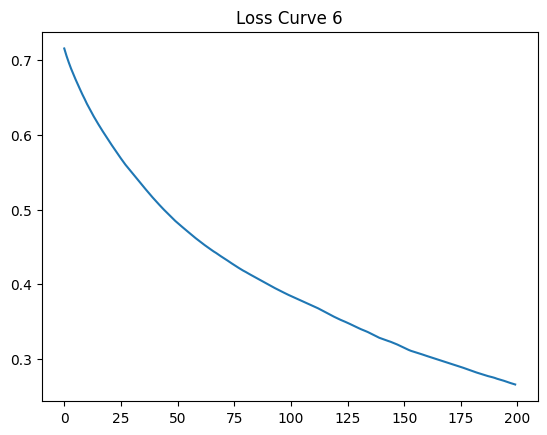

In [31]:
plt.title('Loss Curve 6')
plt.plot(range(len(mlpClassifier6.loss_curve_)),mlpClassifier6.loss_curve_)

<AxesSubplot:>

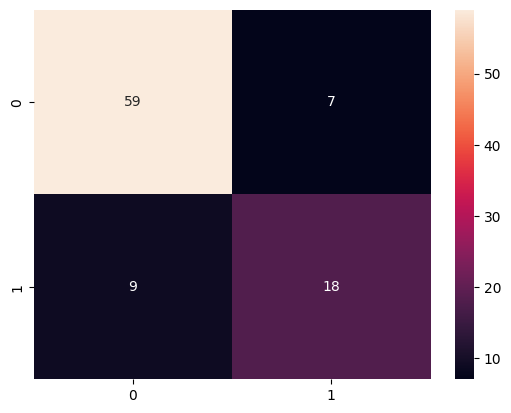

In [32]:
confMatrix6 = metrics.confusion_matrix(y_test,y_pred6)
sns.heatmap(pd.DataFrame(confMatrix6),annot=True)

## Creating the MLP Classifire #7

For the seventh MLP model, we chose the standard SciKit model,now back again with the model with one silge hidden layer and two hundred neurons.<br />
The max_iter is set as the default value: 200 iterations.<br />
The learning rate is set as the default value: 0.001<br />
The learning rate is set to be constant during all the training<br />
The solver is set as the default: 'adam'<br />
The activation function is set as the default: 'relu'<br />

In [33]:
mlpClassifier7 = MLPClassifier(max_iter=200,activation='relu', verbose=False, hidden_layer_sizes=(200,),random_state=1,learning_rate_init=0.001)
mlpClassifier7.fit(X_train, y_train)
y_pred7 = mlpClassifier7.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Analyzing the Classifier #7

In [34]:
analyze(y_test, y_pred7)

79.56989247311827

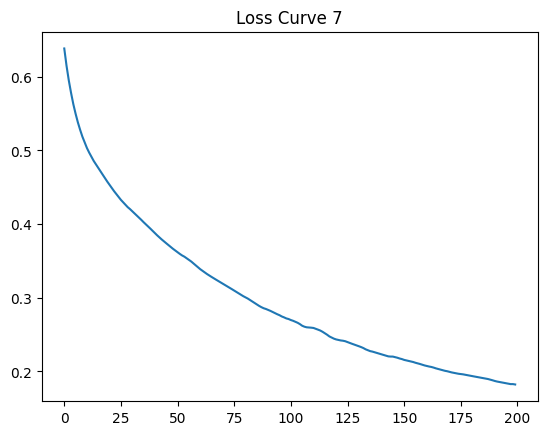

In [35]:
plt.title('Loss Curve 7')
plt.plot(range(len(mlpClassifier7.loss_curve_)),mlpClassifier7.loss_curve_)

<AxesSubplot:>

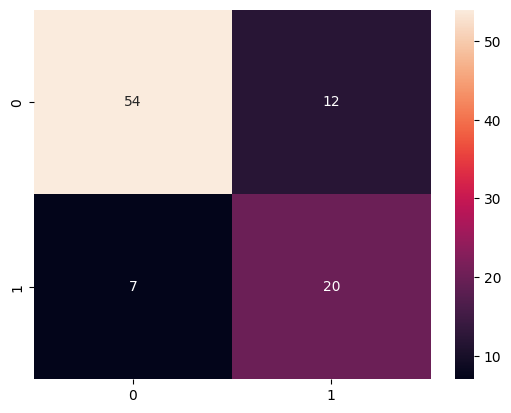

In [36]:
confMatrix7 = metrics.confusion_matrix(y_test,y_pred7)
sns.heatmap(pd.DataFrame(confMatrix7),annot=True)

## Creating the MLP Classifire #8

For the eigth MLP model, we chose the standard SciKit model,this time again with one silge hidden layer, with two hundred neurons, but this time with fewer iteration.<br />
The max_iter is set as the default value: 200 iterations.<br />
The learning rate is set as the default value: 0.001<br />
The learning rate is set to be constant during all the training<br />
The solver is set as the default: 'adam'<br />
The activation function is set as the default: 'relu'<br />

In [37]:
mlpClassifier8 = MLPClassifier(max_iter=110,activation='relu', verbose=False, hidden_layer_sizes=(200,),random_state=1,learning_rate_init=0.001)
mlpClassifier8.fit(X_train, y_train)
y_pred8 = mlpClassifier8.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  warnings.warn(


## Analyzing the Classifier #8

In [38]:
analyze(y_test, y_pred8)

82.79569892473118

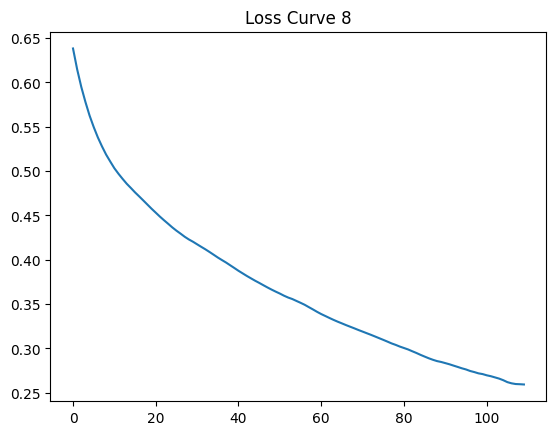

In [39]:
plt.title('Loss Curve 8')
plt.plot(range(len(mlpClassifier8.loss_curve_)),mlpClassifier8.loss_curve_)

<AxesSubplot:>

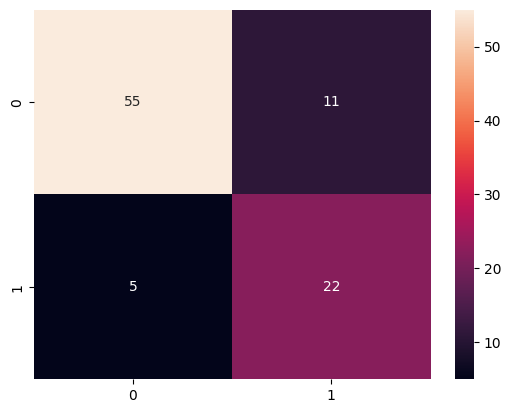

In [40]:
confMatrix8 = metrics.confusion_matrix(y_test,y_pred8)
sns.heatmap(pd.DataFrame(confMatrix8),annot=True)

## Creating the MLP Classifire #9

For the ninth MLP model, we chose the standard SciKit model, utilizing only one hidden layer with two hundred neurons.Tis time a different solver is utilized, the 'sgd', to observe the diferences in outcome.<br />
The max_iter is set as the default value: 200 iterations.<br />
The learning rate is set as the default value: 0.001<br />
The learning rate is set to be constant during all the training<br />
The solver is set as the default: 'sgd'<br />
The activation function is set as the default: 'relu'<br />

In [41]:
mlpClassifier9 = MLPClassifier(max_iter=200,activation='relu', verbose=False, hidden_layer_sizes=(200,),random_state=1,learning_rate_init=0.001,solver='sgd')
mlpClassifier9.fit(X_train, y_train)
y_pred9 = mlpClassifier9.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Analyzing the Classifier #9

In [42]:
analyze(y_test, y_pred9)

75.26881720430107

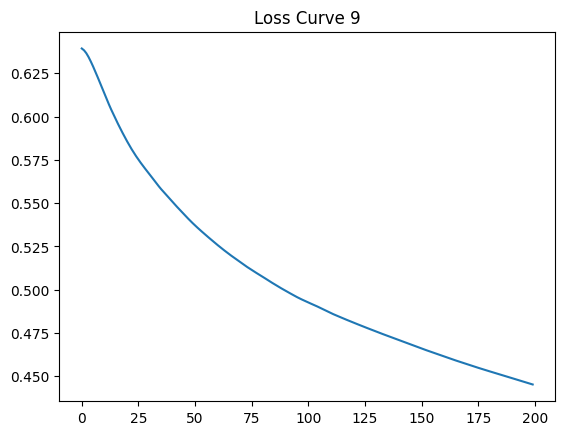

In [43]:
plt.title('Loss Curve 9')
plt.plot(range(len(mlpClassifier9.loss_curve_)),mlpClassifier9.loss_curve_)

<AxesSubplot:>

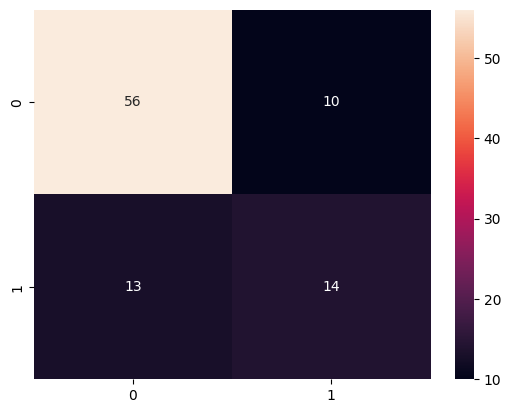

In [44]:
confMatrix9 = metrics.confusion_matrix(y_test,y_pred9)
sns.heatmap(pd.DataFrame(confMatrix9),annot=True)

## Creating the MLP Classifire #10

For the tenth MLP model, we chose the standard SciKit model. Utilizing again the 'sgd' as the solver, we are now using a deeper model, with ten hidden layers, each one with twenty five neurons. The training time was set a bit higher, due to the size of the model, and it's longer time to learn<br />
The max_iter is set as the default value: 800 iterations.<br />
The learning rate is set as the default value: 0.001<br />
The learning rate is set to be constant during all the training<br />
The solver is set as the default: 'sgd'<br />
The activation function is set as the default: 'relu'<br />

In [45]:
mlpClassifier10 = MLPClassifier(max_iter=800,activation='relu', verbose=False, hidden_layer_sizes=(25,10),random_state=1,learning_rate_init=0.001,solver='sgd')
mlpClassifier10.fit(X_train, y_train)
y_pred10 = mlpClassifier10.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


## Analyzing the Classifier #10

In [46]:
analyze(y_test, y_pred10)

80.64516129032258

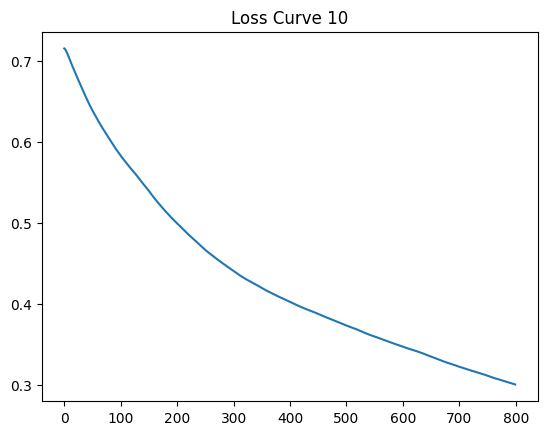

In [47]:
plt.title('Loss Curve 10')
plt.plot(range(len(mlpClassifier10.loss_curve_)),mlpClassifier10.loss_curve_)